# Data PreProcessing


In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [266]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [267]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Text(0.5, 1.0, 'Charge Distribution')

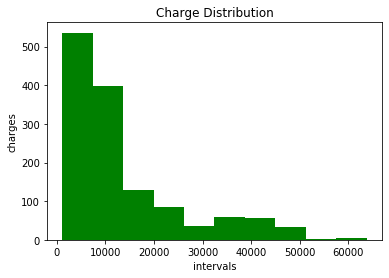

In [268]:
plt.hist(df['charges'],bins=10,color='green')
plt.xlabel('intervals')
plt.ylabel('charges')
plt.title('Charge Distribution')
#skewed towards lower values

In [269]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [270]:
df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [271]:
#iqr method for outlier remover from target variable
q3 = df['charges'].quantile(0.75)
q1 = df['charges'].quantile(0.25)
iqr = q3-q1
iqr

11899.625365

In [272]:
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr
upper_limit,lower_limit

(34489.350562499996, -13109.1508975)

In [273]:
def limit_imputer(value):
    if value > upper_limit:
        return upper_limit
    if value < lower_limit:
        return lower_limit
    else:
        return value

In [274]:
df['charges'] = df['charges'].apply(limit_imputer)  

In [275]:
df['charges'].describe()

count     1338.000000
mean     12479.369251
std      10158.056096
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      34489.350562
Name: charges, dtype: float64

In [276]:
df.corr()
#age, bmi and children have correlation with charges , affects target variable

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.313394
bmi,0.109272,1.000000,0.012759,0.160175
children,0.042469,0.012759,1.000000,0.073074
charges,0.313394,0.160175,0.073074,1.000000


In [277]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [278]:
#anova
from statsmodels.formula.api import ols
import statsmodels.api as sm
mod = ols('charges ~ smoker', data = df).fit()
Anova_Table = sm.stats.anova_lm(mod,typ=2)
print(Anova_Table)
#null hypothesis is rejected and alternate hypothesis is accepted
#therefore this variable impacts target variable

                sum_sq      df            F         PR(>F)
smoker    8.522191e+10     1.0  2158.911216  2.929025e-281
Residual  5.273791e+10  1336.0          NaN            NaN


In [279]:
df.sex.unique()

array(['female', 'male'], dtype=object)

In [280]:
mod = ols('charges ~ sex', data = df).fit()
Anova_Table = sm.stats.anova_lm(mod,typ=2)
print(Anova_Table)
#null hypothesis accepted and alternate hypothesis rejected
#this variable has no impact on the target variable

                sum_sq      df         F    PR(>F)
sex       3.776794e+08     1.0  3.667479  0.055697
Residual  1.375821e+11  1336.0       NaN       NaN


In [281]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [282]:
mod = ols('charges ~ region', data = df).fit()
Anova_Table = sm.stats.anova_lm(mod,typ=2)
print(Anova_Table)
#null hypothesis accepted and alternate hypothesis rejected
#this variable has no impact on the target variable

                sum_sq      df         F    PR(>F)
region    7.266064e+08     3.0  2.354369  0.070411
Residual  1.372332e+11  1334.0       NaN       NaN


In [283]:
df.drop(columns=['sex','region'],inplace=True)

In [284]:
df

,age,bmi,children,smoker,charges
0,19,27.900,0,yes,16884.92400
1,18,33.770,1,no,1725.55230
2,28,33.000,3,no,4449.46200
3,33,22.705,0,no,21984.47061
4,32,28.880,0,no,3866.85520
...,...,...,...,...,...
1333,50,30.970,3,no,10600.54830
1334,18,31.920,0,no,2205.98080
1335,18,36.850,0,no,1629.83350
1336,21,25.800,0,no,2007.94500


In [285]:
df = pd.get_dummies(df , columns=['smoker'],drop_first=True)

Text(0.5, 1.0, 'BMI Distribution')

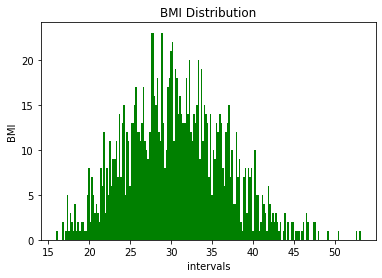

In [286]:
plt.hist(df['bmi'],bins=200,color='green')
plt.xlabel('intervals')
plt.ylabel('BMI')
plt.title('BMI Distribution')
#skewed towards lower values

In [287]:
df['bmi'].head()

0    27.900
1    33.770
2    33.000
3    22.705
4    28.880
Name: bmi, dtype: float64

In [288]:
def log_transform(sample_data):
    return np.log(sample_data)

In [289]:
df['bmi'] = df['bmi'].map(log_transform)

In [290]:
df['bmi'].head()

0    3.328627
1    3.519573
2    3.496508
3    3.122585
4    3.363149
Name: bmi, dtype: float64

Text(0.5, 1.0, 'BMI Distribution')

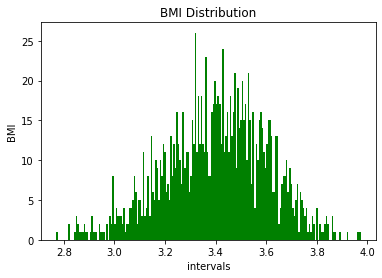

In [291]:
plt.hist(df['bmi'],bins=200,color='green')
plt.xlabel('intervals')
plt.ylabel('BMI')
plt.title('BMI Distribution')

# Dumping PreProcessed Data

In [293]:
df.to_csv('raw_data.csv', index=False)

# Scaling The DataSet

In [227]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y = df['charges']
X = scaler.fit_transform(df.drop(columns=['charges']))
X = pd.DataFrame(data=X,columns=df.drop(columns=['charges']).columns)
X.head()

,age,bmi,children,smoker_yes
0,-1.438764,-0.367160,-0.908614,1.970587
1,-1.509965,0.576175,-0.078767,-0.507463
2,-0.797954,0.462225,1.580926,-0.507463
3,-0.441948,-1.385070,-0.908614,-0.507463
4,-0.513149,-0.196607,-0.908614,-0.507463


In [228]:
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

# Splitting The DataSet

In [229]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
x_train.shape, x_test.shape , y_train.shape, y_test.shape

((1070, 4), (268, 4), (1070,), (268,))

# Fitting The Model

In [230]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)
lr.fit(x_train,y_train)

LinearRegression(normalize=True)

In [231]:
predictions = lr.predict(x_test)
lr.score(x_test,y_test)

0.7810556632830701

# Coefficient Plot

In [236]:
coefficients_table = pd.DataFrame({'columns':x_train.columns,'coefficients':lr.coef_ })
coefficients_table = coefficients_table.sort_values(by='coefficients')

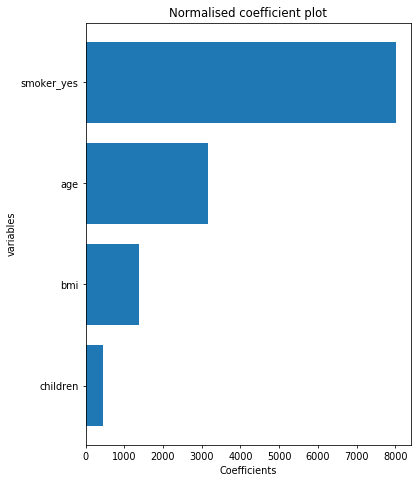

In [237]:
plt.figure(figsize=(6,8),dpi=70)
x = coefficients_table['columns']
y = coefficients_table['coefficients']
plt.barh(x,y)
plt.xlabel('Coefficients')
plt.ylabel('variables')
plt.title('Normalised coefficient plot')
plt.show()

# Model Dumping

In [238]:
from joblib import dump,load
dump(lr,'insurance.joblib')

['insurance.joblib']